
## In this exercise, we will use the HR dataset and understand the following using caret package:

> 1. Building the naive bayes model
2. What is marked as the positive class by the model when using caret package
3. Writing the model equation and interpreting the model summary
4. Creating the Confusion Matrix and ROC plot on train data
5. Creating the Confusion Matrix and ROC plot on test data

There are bugs/missing code in the entire exercise. The participants are expected to work upon them.

***

# Code starts here
We are going to use below mentioned libraries for demonstrating logistic regression:



In [15]:
#install.packages("klaR", "/Users/Rahul/anaconda3/lib/R/library")

Warning message in install.packages("klaR", "/Users/Rahul/anaconda3/lib/R/library"):
"'lib = "/Users/Rahul/anaconda3/lib/R/library"' is not writable"

ERROR: Error in install.packages("klaR", "/Users/Rahul/anaconda3/lib/R/library"): unable to install packages


In [3]:
library(caret)    #for data partition. Model building
library(ROCR)     #for ROC plot (other way)


## Data Import and Manipulation

### 1. Importing a data set

_Give the correct path to the data_



In [4]:
raw_df <- read.csv("C:/Users/Administrator/Desktop/Data_Science_with_Python_and_R/Code files/Dataset/HR_Data_No_Missing_Value.csv", header = TRUE,sep = ",",na.strings = c(""," ", "NA"))

raw_df[1779,
      ]

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
1779,2653,2328204,Yes,12,30,E1,25,25,0,No,No,Male,Direct,3,ERS,Chennai,27,Joined



Note that `echo = FALSE` parameter prevents printing the R code that generated the
plot.

### 2. Structure and Summary of the dataset



In [5]:
str(raw_df)
summary(raw_df)

'data.frame':	8995 obs. of  18 variables:
 $ SLNO                       : int  1 2 3 4 5 6 7 9 11 12 ...
 $ Candidate.Ref              : int  2110407 2112635 2112838 2115021 2115125 2117167 2119124 2127572 2138169 2143362 ...
 $ DOJ.Extended               : Factor w/ 2 levels "No","Yes": 2 1 1 1 2 2 2 2 1 1 ...
 $ Duration.to.accept.offer   : int  14 18 3 26 1 17 37 16 1 6 ...
 $ Notice.period              : int  30 30 45 30 120 30 30 0 30 30 ...
 $ Offered.band               : Factor w/ 4 levels "E0","E1","E2",..: 3 3 3 3 3 2 3 2 2 2 ...
 $ Pecent.hike.expected.in.CTC: num  -20.8 50 42.8 42.8 42.6 ...
 $ Percent.hike.offered.in.CTC: num  13.2 320 42.8 42.8 42.6 ...
 $ Percent.difference.CTC     : num  42.9 180 0 0 0 ...
 $ Joining.Bonus              : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Candidate.relocate.actual  : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 1 1 1 1 ...
 $ Gender                     : Factor w/ 2 levels "Female","Male": 1 2 2 2 2 2 2 1 1 2 ...
 $ 

      SLNO       Candidate.Ref     DOJ.Extended Duration.to.accept.offer
 Min.   :    1   Min.   :2109586   No :4788     Min.   :  0.00          
 1st Qu.: 3208   1st Qu.:2386476   Yes:4207     1st Qu.:  3.00          
 Median : 5976   Median :2807482                Median : 10.00          
 Mean   : 5971   Mean   :2843647                Mean   : 21.43          
 3rd Qu.: 8739   3rd Qu.:3300060                3rd Qu.: 33.00          
 Max.   :12333   Max.   :3836076                Max.   :224.00          
                                                                        
 Notice.period    Offered.band Pecent.hike.expected.in.CTC
 Min.   :  0.00   E0: 211      Min.   :-68.83             
 1st Qu.: 30.00   E1:5568      1st Qu.: 27.27             
 Median : 30.00   E2:2711      Median : 40.00             
 Mean   : 39.29   E3: 505      Mean   : 43.86             
 3rd Qu.: 60.00                3rd Qu.: 53.85             
 Max.   :120.00                Max.   :359.77             
   



Create a new data frame and store the raw data copy. This is being done to have a copy of the raw data intact for further manipulation if needed.



In [6]:
filter_df <- na.omit(raw_df) # listwise deletion of missing


### 3. Create train and test dataset

#### Reserve 80% for **_training_** and 20% of **_test_**

_Correct the error in the below code chunk_


In [7]:
set.seed(2341)
trainIndex <- createDataPartition(filter_df$Status, p = 0.80, list = FALSE)
train_df <- filter_df[trainIndex,]
test_df <- filter_df[-trainIndex,]


We can pull the specific attribute needed to build the model is another data frame. This agian is more of a hygine practice to not touch the **train** and **test** data set directly.

In [8]:
naive_train_df <- as.data.frame(train_df[,c("DOJ.Extended",
                                             "Duration.to.accept.offer",
                                             #"Notice.period",
                                             "Offered.band",
                                             #"Percent.difference.CTC",
                                             #"Joining.Bonus",
                                             #"Gender",
                                             #"Candidate.Source",
                                             #"Rex.in.Yrs",
                                             "LOB",
                                             #"Location",
                                             #"Age",
                                             "Status"
)])


_Correct the error in the below code chunk_


In [9]:
naive_test_df <- as.data.frame(test_df[,c("DOJ.Extended",
                                           "Duration.to.accept.offer",
                                           #"Notice.period",
                                           "Offered.band",
                                           #"Percent.difference.CTC",
                                           #"Joining.Bonus",
                                           #"Gender",
                                           #"Candidate.Source",
                                           #"Rex.in.Yrs",
                                           "LOB",
                                           #"Location",
                                           #"Age",
                                           "Status"
)])


***

## Model Building: Using the **caret()** package
There are a number of models which can be built using caret package. To get the names of all the models possible.



In [10]:
names(getModelInfo())

[1] "ada"                 "AdaBag"              "AdaBoost.M1"        
  [4] "adaboost"            "amdai"               "ANFIS"              
  [7] "avNNet"              "awnb"                "awtan"              
 [10] "bag"                 "bagEarth"            "bagEarthGCV"        
 [13] "bagFDA"              "bagFDAGCV"           "bam"                
 [16] "bartMachine"         "bayesglm"            "binda"              
 [19] "blackboost"          "blasso"              "blassoAveraged"     
 [22] "bridge"              "brnn"                "BstLm"              
 [25] "bstSm"               "bstTree"             "C5.0"               
 [28] "C5.0Cost"            "C5.0Rules"           "C5.0Tree"           
 [31] "cforest"             "chaid"               "CSimca"             
 [34] "ctree"               "ctree2"              "cubist"             
 [37] "dda"                 "deepboost"           "DENFIS"             
 [40] "dnn"                 "dwdLinear"           "dwdPoly"            
 [43] "dwdRadial"           "earth"               "elm"                
 [46] "enet"                "evtree"              "extraTrees"         
 [49] "fda"                 "FH.GBML"             "FIR.DM"             
 [52] "foba"                "FRBCS.CHI"           "FRBCS.W"            
 [55] "FS.HGD"              "gam"                 "gamboost"           
 [58] "gamLoess"            "gamSpline"           "gaussprLinear"      
 [61] "gaussprPoly"         "gaussprRadial"       "gbm_h2o"            
 [64] "gbm"                 "gcvEarth"            "GFS.FR.MOGUL"       
 [67] "GFS.LT.RS"           "GFS.THRIFT"          "glm.nb"             
 [70] "glm"                 "glmboost"            "glmnet_h2o"         
 [73] "glmnet"              "glmStepAIC"          "gpls"               
 [76] "hda"                 "hdda"                "hdrda"              
 [79] "HYFIS"               "icr"                 "J48"                
 [82] "JRip"                "kernelpls"           "kknn"               
 [85] "knn"                 "krlsPoly"            "krlsRadial"         
 [88] "lars"                "lars2"               "lasso"              
 [91] "lda"                 "lda2"                "leapBackward"       
 [94] "leapForward"         "leapSeq"             "Linda"              
 [97] "lm"                  "lmStepAIC"           "LMT"                
[100] "loclda"              "logicBag"            "LogitBoost"         
[103] "logreg"              "lssvmLinear"         "lssvmPoly"          
[106] "lssvmRadial"         "lvq"                 "M5"                 
[109] "M5Rules"             "manb"                "mda"                
[112] "Mlda"                "mlp"                 "mlpKerasDecay"      
[115] "mlpKerasDecayCost"   "mlpKerasDropout"     "mlpKerasDropoutCost"
[118] "mlpML"               "mlpSGD"              "mlpWeightDecay"     
[121] "mlpWeightDecayML"    "monmlp"              "msaenet"            
[124] "multinom"            "mxnet"               "mxnetAdam"          
[127] "naive_bayes"         "nb"                  "nbDiscrete"         
[130] "nbSearch"            "neuralnet"           "nnet"               
[133] "nnls"                "nodeHarvest"         "null"               
[136] "OneR"                "ordinalNet"          "ORFlog"             
[139] "ORFpls"              "ORFridge"            "ORFsvm"             
[142] "ownn"                "pam"                 "parRF"              
[145] "PART"                "partDSA"             "pcaNNet"            
[148] "pcr"                 "pda"                 "pda2"               
[151] "penalized"           "PenalizedLDA"        "plr"                
[154] "pls"                 "plsRglm"             "polr"               
[157] "ppr"                 "PRIM"                "protoclass"         
[160] "pythonKnnReg"        "qda"                 "QdaCov"             
[163] "qrf"                 "qrnn"                "randomGLM"          
[166] "ranger"              "rbf"         


To get the info on specific model:



In [11]:
getModelInfo()$glm$type

[1] "Regression"     "Classification"


The below chunk of code is standarized way of building model using caret package. Setting in the control parameters for the model.



In [12]:
set.seed(1234)
objControl <- trainControl(method = "cv", number = 2, returnResamp = 'none',
                           summaryFunction = twoClassSummary,
                           #summaryFunction = twoClassSummary, defaultSummary
                           classProbs = TRUE,
                           savePredictions = TRUE)


The search grid is basically a model fine tuning option. The paramter inside the **expan.grid()** function varies according to model. The **[complete](http://topepo.github.io/caret/available-models.html)** list of tuning paramter for different models.

A useful read on how numeric variables are taken care of by kernal density function is here: http://uc-r.github.io/naive_bayes

> * usekernel parameter allows us to use a kernel density estimate for continuous variables versus a guassian density estimate,
* adjust allows us to adjust the bandwidth of the kernel density (larger numbers mean more flexible density estimate),
* fL allows us to incorporate the Laplace smoother

In [13]:
#This parameter is for glmnet. Need not be executed if method  is glmStepAIC
searchGrid <-  expand.grid(usekernel=c(TRUE), fL = c(1:5), adjust=c(1:5))


The model building starts here.
> 1. **metric= "ROC"** uses ROC curve to select the best model.Accuracy, Kappa are other options. To use this change twoClassSummary to defaultSummary in **ObjControl**
2. **verbose = FALSE**: does not show the processing output on console

The factor names at times may not be consistent. R may expect **"Not.Joined"** but the actual level may be **"Not Joined"** This is corrected by using **make.names()** function to give syntactically valid names.

In case of large number of predictors and particularly (numeric predicators), the naive bayes (with kernal density estimation) may end up giving warning messages `Numerical 0 probability for all classes with observation...`.

Please refer to the post to know about the issue: https://github.com/topepo/caret/issues/793

In [14]:
#naive_train_df$StatusFactor <- as.factor(ifelse(naive_train_df$Status == "Joined", 1,0))
set.seed(766)
levels(naive_train_df$Status) <- make.names(levels(factor(naive_train_df$Status)))
naive_caret_model <- train(naive_train_df[,1:4],
                      naive_train_df[,5],
                      method = 'nb', #'glm', glmnet
                      trControl = objControl,
                      tuneGrid= searchGrid,
                      metric = "ROC")

1 package is needed for this model and is not installed. (klaR). Would you like to try to install it now?

ERROR: Error: Required package is missing




## Model Evaluation

### 1. One useful plot from caret package is the variable importance plot

In case you get an error "Invalid Graphic state", uncomment the line below


In [14]:
naive_caret_model
summary(naive_caret_model$finalModel)

#dev.off()
#plot(varImp(naive_caret_model, scale = TRUE))

Naive Bayes 

7197 samples
   4 predictor
   2 classes: 'Joined', 'Not.Joined' 

No pre-processing
Resampling: Cross-Validated (2 fold) 
Summary of sample sizes: 3598, 3599 
Resampling results across tuning parameters:

  fL  adjust  ROC        Sens       Spec       
  1   1       0.6128812  0.9976074  0.026002972
  1   2       0.5966586  0.9984618  0.021545319
  1   3       0.5848701  0.9988036  0.013372957
  1   4       0.5834954  0.9989745  0.006686478
  1   5       0.5852380  0.9993164  0.004457652
  2   1       0.6126230  0.9976074  0.026002972
  2   2       0.5956725  0.9982909  0.021545319
  2   3       0.5836627  0.9988036  0.013372957
  2   4       0.5827498  0.9989745  0.006686478
  2   5       0.5845042  0.9993164  0.004457652
  3   1       0.6125996  0.9976074  0.026002972
  3   2       0.5954838  0.9982909  0.022288262
  3   3       0.5835337  0.9988036  0.014858841
  3   4       0.5825063  0.9989745  0.006686478
  3   5       0.5844353  0.9993164  0.004457652
  4   1     

            Length Class      Mode     
apriori     2      table      numeric  
tables      4      -none-     list     
levels      2      -none-     character
call        6      -none-     call     
x           4      data.frame list     
usekernel   1      -none-     logical  
varnames    4      -none-     character
xNames      4      -none-     character
problemType 1      -none-     character
tuneValue   3      data.frame list     
obsLevels   2      -none-     character
param       0      -none-     list     



### 2. The prediction and confusion Matrix on train data.

The syntax for prediction in caret is almost similar expect the the **type** attribute expects input as **'raw'** or **'prob'**. In case of prob, the predicted value holds the probability of both positive and negative class.



In [15]:
#Missing code. May result in error
levels(naive_train_df$Status) <- make.names(levels(factor(naive_train_df$Status)))
caretPredictedClass <- predict(object = naive_caret_model, naive_train_df[,1:4], type = 'raw')
confusionMatrix(caretPredictedClass,naive_train_df$Status)

Confusion Matrix and Statistics

            Reference
Prediction   Joined Not.Joined
  Joined       5838       1310
  Not.Joined     13         36
                                         
               Accuracy : 0.8162         
                 95% CI : (0.807, 0.8251)
    No Information Rate : 0.813          
    P-Value [Acc > NIR] : 0.2487         
                                         
                  Kappa : 0.039          
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.99778        
            Specificity : 0.02675        
         Pos Pred Value : 0.81673        
         Neg Pred Value : 0.73469        
             Prevalence : 0.81298        
         Detection Rate : 0.81117        
   Detection Prevalence : 0.99319        
      Balanced Accuracy : 0.51226        
                                         
       'Positive' Class : Joined         
                                         


### 4. Confusion Matrix on the test data

The **predict** function is used to get the predicted probability on the new dataset. The probability value along with the optimal cut-off can be used to build confusion matrix



In [16]:
test_predicted_prob = predict(naive_caret_model, naive_test_df, type = "prob")

#variable with all the values as joined
n <- length(naive_test_df$Status)
predicted_y = rep("Not Joined", n)

# defining log odds in favor of not joining
predicted_y[test_predicted_prob[1] > test_predicted_prob[2]] = "Joined"

#add the model_precition in the data
naive_test_df$predicted_y <- predicted_y

###Create the confusionmatrix###
addmargins(table(naive_test_df$Status, naive_test_df$predicted_y))
mean(naive_test_df$predicted_y == naive_test_df$Status)

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1317”

,Joined,Not Joined,Sum
Joined,1458,4,1462
Not Joined,328,8,336
Sum,1786,12,1798


[1] 0.8153504



### 5. ROC Plot on the test data

ROCR package can be used to evaluate the model performace on the test data. The same package can also be used to get the model performace on the test data.



An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.6102809


Slot "alpha.values":
list()


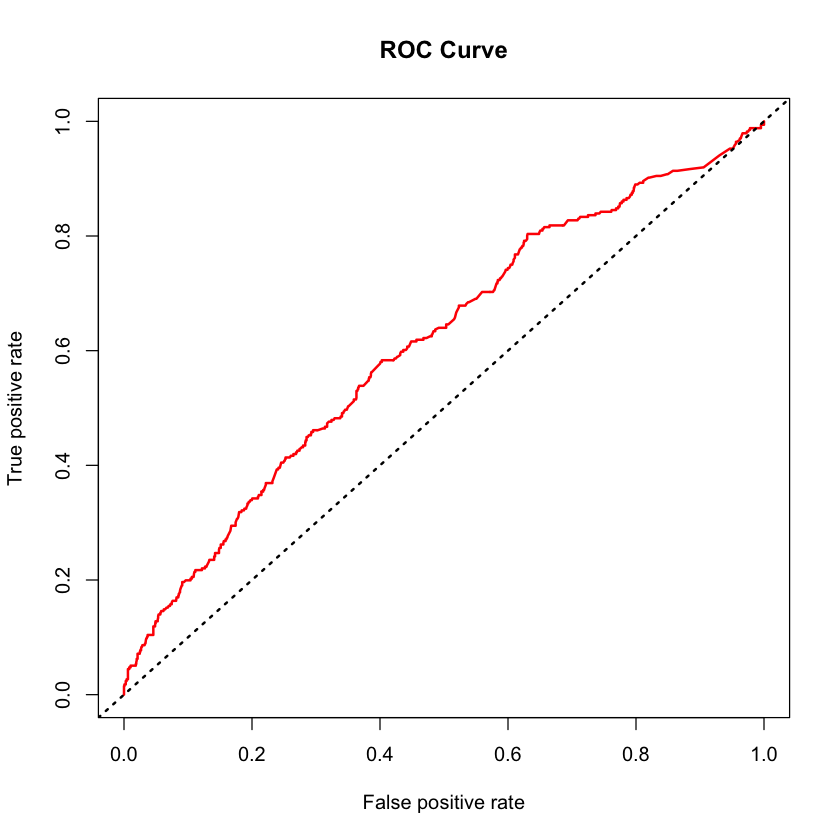

In [17]:
#error in below line
lgPredObj <- prediction(test_predicted_prob[2],naive_test_df$Status)
lgPerfObj <- performance(lgPredObj, "tpr","fpr")
plot(lgPerfObj,main = "ROC Curve",col = 2,lwd = 2)
abline(a = 0,b = 1,lwd = 2,lty = 3,col = "black")
performance(lgPredObj, "auc")


#### End of Document

***
***
